In [17]:
import os
import numpy as np
import pandas as pd

import random

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = np.loadtxt('./NN_digits_train.csv', delimiter=',', dtype=int, skiprows=1)

In [5]:
classes = digits[:, 0]
pixels = digits[:, 1:]

In [22]:
pixels = pixels / 255

---
exploring data

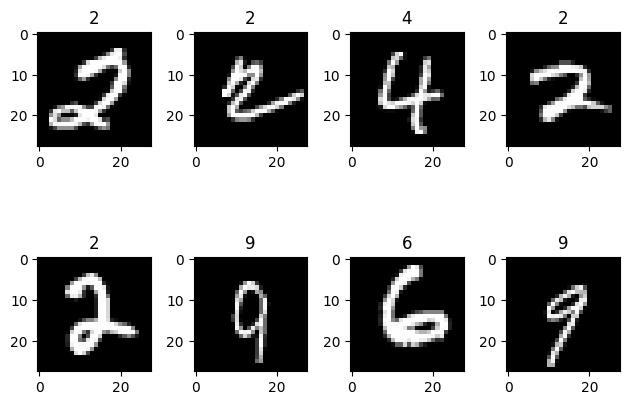

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=4)

for i in range(8):
    idx = random.randint(0, len(pixels)-1)
    axs[i//4, i%4].set_title(classes[idx])
    axs[i//4, i%4].imshow(pixels[idx].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show() 

---
how convolutions work

In [24]:
from scipy.ndimage import convolve

In [25]:
i = 1000
img = pixels[i].reshape(28, 28)

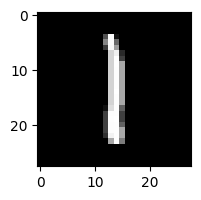

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')

In [34]:
def convolve2d(image, kernel, stride=1, padding=0):
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
    return new_image

In [41]:
KERNEL_SIZE = (9, 9)
NUM = 81

In [42]:
# vertical kernels
kernel0 = np.zeros(KERNEL_SIZE)
kernel0[:, 0] = 1
kernel0 /= NUM

kernel1 = np.zeros(KERNEL_SIZE)
kernel1[:, 4] = 1
kernel1 /= NUM

kernel2 = np.zeros(KERNEL_SIZE)
kernel2[:, 8] = 1
kernel2 /= NUM

In [43]:
# vertical kernels
kernel3 = np.zeros(KERNEL_SIZE)
kernel3[0, :] = 1
kernel3 /= NUM

kernel4 = np.zeros(KERNEL_SIZE)
kernel4[4, :] = 1
kernel4 /= NUM

kernel5 = np.zeros(KERNEL_SIZE)
kernel5[8, :] = 1
kernel5 /= NUM

In [49]:
# diagonal kernels
kernel6 = np.zeros(KERNEL_SIZE)
for i in range(KERNEL_SIZE[0]):
    kernel6[i, i] = 1
kernel6 /= NUM

kernel7 = np.zeros(KERNEL_SIZE)
for i in range(KERNEL_SIZE[0]):
    kernel7[i, KERNEL_SIZE[0] - 1 - i] = 1
kernel7 /= NUM

kernel8 = np.zeros(KERNEL_SIZE)
for i in range(KERNEL_SIZE[0]):
    kernel8[i, i] = 1
    kernel8[i, KERNEL_SIZE[0] - 1 - i] = 1
kernel8 /= NUM

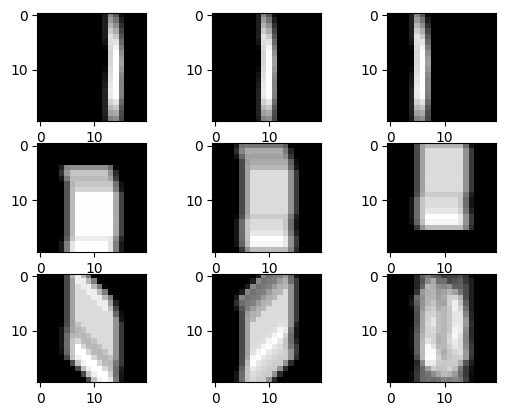

In [50]:
fig, axs = plt.subplots(ncols=3, nrows=3)

axs[0][0].imshow(convolve2d(img, kernel0), cmap='gray')
axs[0][1].imshow(convolve2d(img, kernel1), cmap='gray')
axs[0][2].imshow(convolve2d(img, kernel2), cmap='gray')

axs[1][0].imshow(convolve2d(img, kernel3), cmap='gray')
axs[1][1].imshow(convolve2d(img, kernel4), cmap='gray')
axs[1][2].imshow(convolve2d(img, kernel5), cmap='gray')

axs[2][0].imshow(convolve2d(img, kernel6), cmap='gray')
axs[2][1].imshow(convolve2d(img, kernel7), cmap='gray')
axs[2][2].imshow(convolve2d(img, kernel8), cmap='gray')